In [2]:
%load_ext autoreload
%autoreload 2

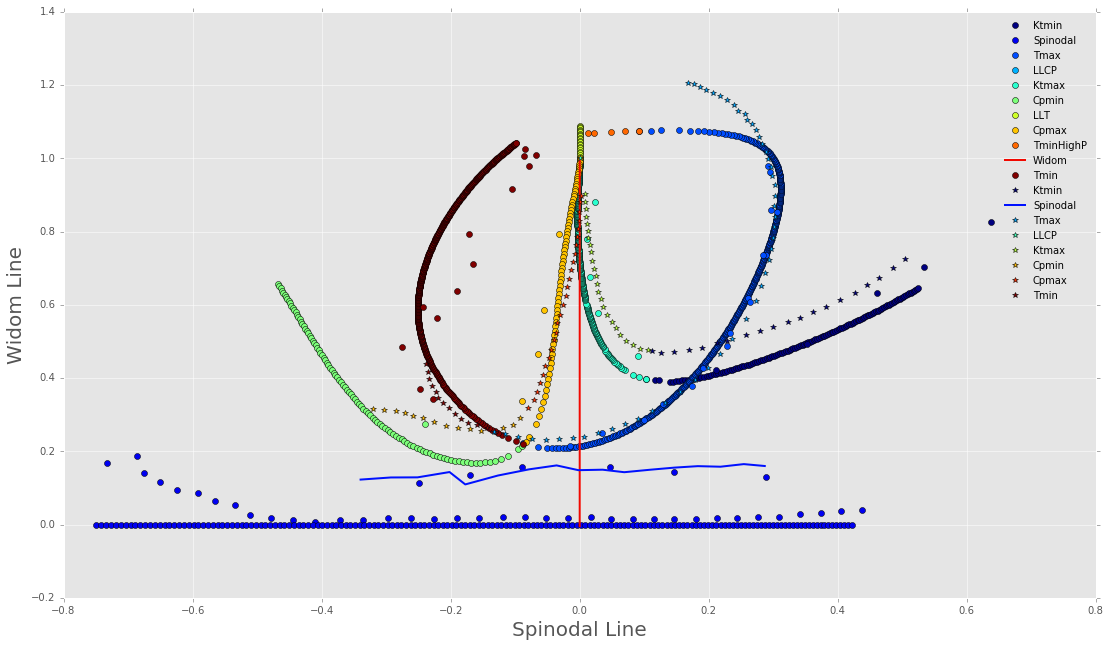

In [3]:
import GuggenWater as gw
import numpy as np
import matplotlib.pyplot as plt


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

T,P,Feature,Src = np.loadtxt('Features.dat',dtype={'names':('T','P','F','S'),'formats':(np.float,np.float,'S9','S9')},
 usecols=(0,1,2,3),unpack=True,skiprows=1)

Property = np.array([str(s,'utf-8') for s in Feature])
Source = np.array([str(s,'utf-8') for s in Src])


mycb = "rescale"#"classicAndWidom"

model = gw.GuggenheimWater()
for t,p,ppty,src in zip(T,P,Property, Source):
    model.addPoint(t,p,ppty,src,callback=mycb)
model.plot(savefig=True,skip=['Widom'],style='ggplot',wait=True)
model.writetoFile('All.dat',callback=mycb,add_critical_pt=False)

st2 = gw.ST2I_mean_field()
#st2.spinodal[0] -= 250.
model2 = gw.GuggenheimWater(st2)
T,P,Feature,Src = np.loadtxt('FeaturesST2.dat',dtype={'names':('T','P','F','S'),'formats':(np.float,np.float,'S9','S9')},
 usecols=(0,1,2,3),unpack=True,skiprows=1)

Property = np.array([str(s,'utf-8') for s in Feature])
Source = np.array([str(s,'utf-8') for s in Src])

offset = 1.6#/(gw.ST2I_mean_field().getSpinodalCriticalPointOffset() / gw.TIP4P2005().getSpinodalCriticalPointOffset())


for t,p,ppty,src in zip(T,P,Property,Source): model2.addPoint(t,p,ppty,src,offset,callback=mycb)
model2.writetoFile("All.dat",offsetCriticalPt=offset,isnew=False,callback=mycb)
model2.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='*')


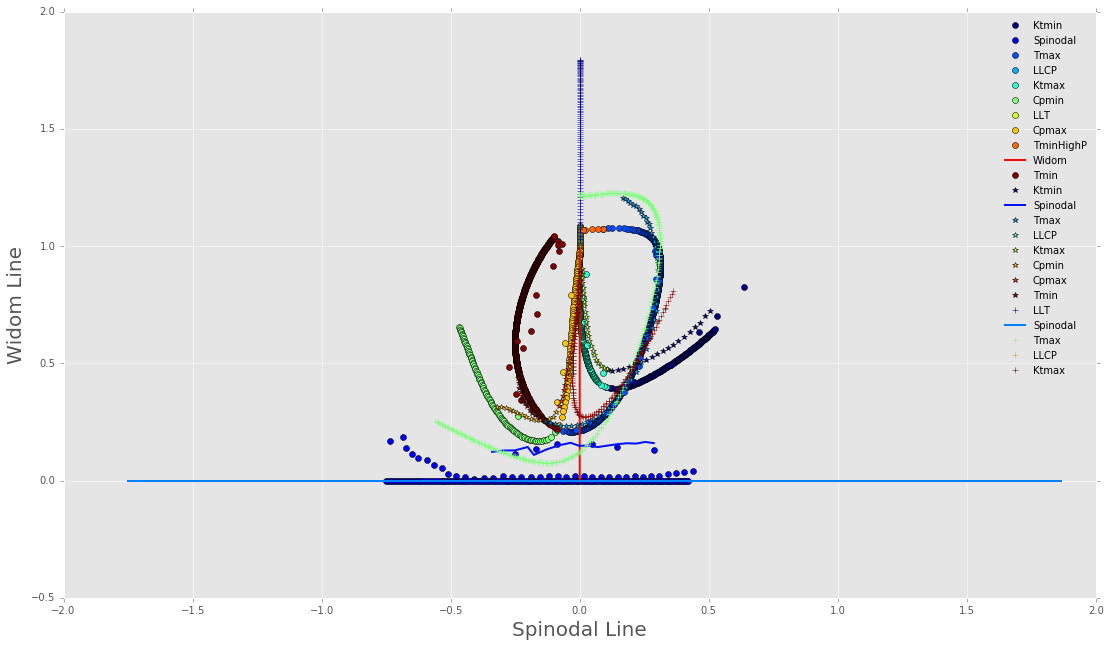

In [4]:
import GuggenWater as gw
import GuggenToy as gwt
import numpy as np
import matplotlib.pyplot as plt


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

T,P,Feature,Src = np.loadtxt('Features.dat',dtype={'names':('T','P','F','S'),'formats':(np.float,np.float,'S9','S9')},
 usecols=(0,1,2,3),unpack=True,skiprows=1)

Property = np.array([str(s,'utf-8') for s in Feature])
Source = np.array([str(s,'utf-8') for s in Src])


mycb = "rescale"#"classicAndWidom"

model = gw.GuggenheimWater()
for t,p,ppty,src in zip(T,P,Property, Source):
    model.addPoint(t,p,ppty,src,callback=mycb)
model.plot(savefig=True,skip=['Widom'],style='ggplot',wait=True)
model.writetoFile('All.dat',callback=mycb,add_critical_pt=False)

st2 = gw.ST2I_mean_field()
#st2.spinodal[0] -= 250.
model2 = gw.GuggenheimWater(st2)
T,P,Feature,Src = np.loadtxt('FeaturesST2.dat',dtype={'names':('T','P','F','S'),'formats':(np.float,np.float,'S9','S9')},
 usecols=(0,1,2,3),unpack=True,skiprows=1)

Property = np.array([str(s,'utf-8') for s in Feature])
Source = np.array([str(s,'utf-8') for s in Src])

offset = 1.6#/(gw.ST2I_mean_field().getSpinodalCriticalPointOffset() / gw.TIP4P2005().getSpinodalCriticalPointOffset())


for t,p,ppty,src in zip(T,P,Property,Source): model2.addPoint(t,p,ppty,src,offset,callback=mycb)
model2.writetoFile("All.dat",offsetCriticalPt=offset,isnew=False,callback=mycb)
model2.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=True,marker='*')


ty = gwt.ToyModel(0.3,1.,a2=-0.1)
model3 = gwt.GuggenModel(ty)

from load_data import *


labeldict = {'CpM':'Cpmax','TMD':'Tmax','KtM':'Ktmax','LLCP':'LLCP','LVS':'Spinodal','LLT':'LLT'}
Data = load_data(filename="../Data/a2_01_3.pkl")
minpress = -3.5
maxpcmp = 2.5
offset = 0.8
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if ppty == "CpM" and p > maxtemp: continue
            if ppty == "KtM" and p > 0.25: continue
            if ppty == "TMD" and t < 0.25: continue
            if ppty in ["VLS","VLT"] : continue
            model3.addPoint(t,p,labeldict[ppty],Source="LGRXN",callback=mycb,offsetCriticalPt=offset)
    except:
        pass
ppty="LLCP"
T,P = Data[ppty]
model3.addPoint(T,P,ppty,Source="LGRXN",callback=mycb,offsetCriticalPt=offset)
model3.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='+')

model3.writetoFile("All.dat",offsetCriticalPt=offset,isnew=False,callback=mycb)



0.3 0.333333333333


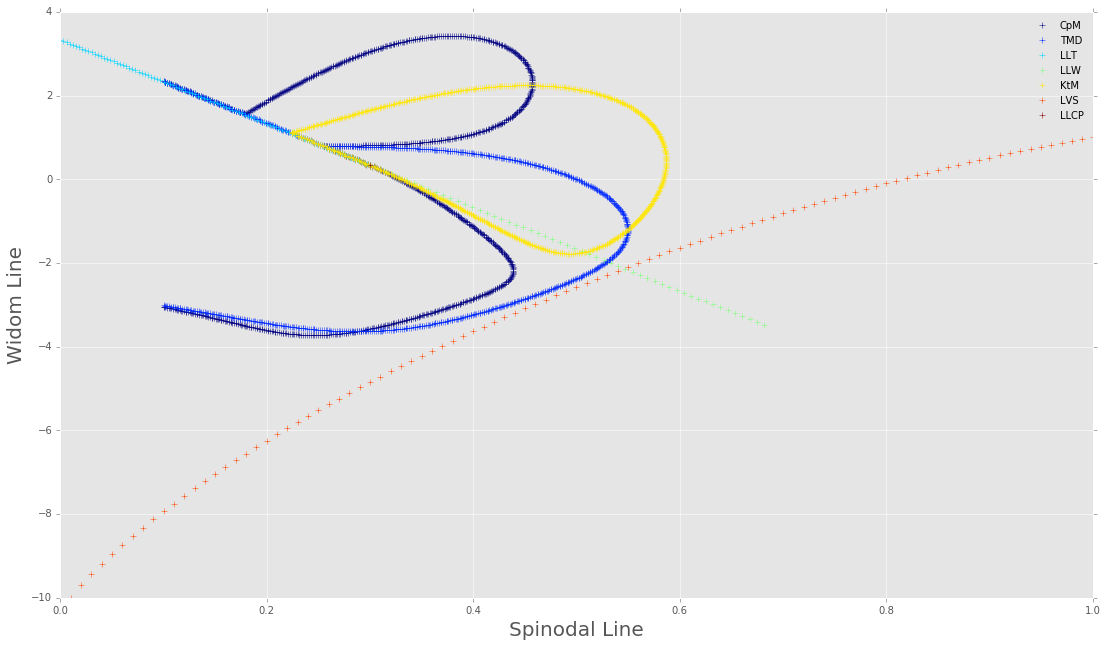

In [55]:
ty = gwt.ToyModel(0.3,0.333,a2=-0.3)
model3 = gwt.GuggenModel(ty)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from load_data import *

Data = load_data(filename="../Data/a2_03_3.pkl")

minpress = -3.5
mycb="identity"
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P):
            if ppty == "LLW" and p < minpress: continue
            if ppty in ["VLS","VLT"] : continue
            model3.addPoint(t,p,ppty,Source="LGRxn1",callback=mycb)
    except:
        pass
ppty="LLCP"
T,P = Data[ppty]
print(T,P)
model3.addPoint(T,P,ppty,Source="LGRxn1",callback=mycb)
model3.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='+')

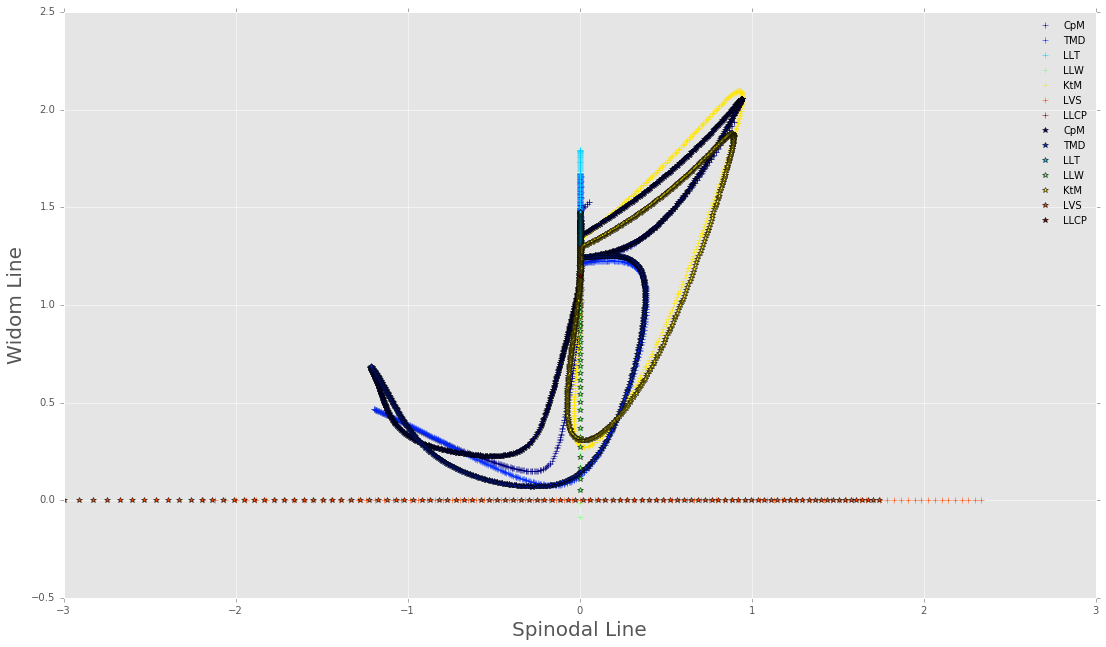

(0.29999999999999999, 0.33333333333333365)
(0.29999999999999999, 3.3333333333333366)


In [52]:
mycb = "rescale"#"classicAndWidom"

ty = gwt.ToyModel(0.3,1.,a2=-0.1)
model3 = gwt.GuggenModel(ty)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Data = load_data(filename="../Data/a2_01_3.pkl")
minpress = -3.5
maxpress = 5.
offset = 1.
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if ppty == "CpM" and p > maxpress: continue
            if ppty in ["VLS","VLT"] : continue
            model3.addPoint(t,p,ppty,Source="LGRxn2",callback=mycb,offsetCriticalPt=offset)
    except:
        pass
ppty="LLCP"
T,P = Data[ppty]
model3.addPoint(T,P,ppty,Source="LGRxn2",callback=mycb,offsetCriticalPt=offset)
model3.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=True,marker='+')
model3.writetoFile('LGRXN-r-2.dat',callback=mycb,add_critical_pt=False)

Data = load_data(filename="../Data/a2_03_3.pkl")
ty = gwt.ToyModel(0.3,1./3.)
model4 = gwt.GuggenModel(ty)
minpress = -2.1
off1 = 0.68
off2=1.15
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if ppty in ["VLS","VLT"] : continue
            model4.addPoint(t,p,ppty,Source="LGRxn1",callback=mycb,offsetCriticalPt=off1,off2=off2)
    except:
        pass
ppty="LLCP"
T,P = Data[ppty]
model4.addPoint(T,P,ppty,Source="LGRxn1",callback=mycb,offsetCriticalPt=off1,off2=off2)
model4.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='*')
model4.writetoFile('LGRXN-r-1.dat',callback=mycb,add_critical_pt=False)

print((T,P))

Data = load_data(filename="../Data/a2_003_3.pkl")
ty = gwt.ToyModel(0.3,10./3.,a2=-0.03)
model5 = gwt.GuggenModel(ty)
minpress = -2.1
offset = 1.2
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if t >= 0.6: continue
            if ppty in ["VLS","VLT"] : continue
            model5.addPoint(t,p,ppty,Source="LGRxn3",callback=mycb,offsetCriticalPt=offset,off2=1.)
    except:
        pass
ppty="LLCP"
T,P = Data[ppty]
model5.addPoint(T,P,ppty,Source="LGRxn3",callback=mycb,offsetCriticalPt=offset)
#model5.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='*')
model5.writetoFile('LGRXN-r-3.dat',callback=mycb,add_critical_pt=False)

print((T,P))



In [6]:
import pandas as pd

In [9]:
Data['CpM']

array([[  0.1       ,   0.10180361,   0.10360721, ...,   0.27559982,
          0.27615833,   0.27671319],
       [ -3.70502158,  -3.69161667,  -3.67837539, ...,  29.83967936,
         29.91983968,  30.        ]])

(0.29999999999999999, 1.0000000000000009)


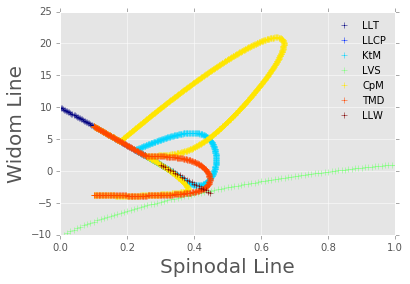

In [37]:
mycb = "identity"#"classicAndWidom"

ty = gwt.ToyModel(0.3,1.,a2=-0.1)
model3 = gwt.GuggenModel(ty)

Data = load_data(filename="../Data/a2_01_3.pkl")
minpress = -3.5
maxpress = 5.
offset = 1.
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if ppty == "CpM" and p > np.inf: continue
            if ppty in ["VLS","VLT"] : continue
            model3.addPoint(t,p,ppty,Source="LGRxn2",callback=mycb,offsetCriticalPt=offset)
    except:
        pass
ppty="LLCP"
T,P=Data[ppty]
print((T,P))
model3.addPoint(T,P,ppty,Source="LGRxn2",callback=mycb,offsetCriticalPt=offset)
model3.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='+')
model3.writetoFile('LGRXN-All.dat',callback=mycb,add_critical_pt=False)

(0.29999999999999999, 0.33333333333333365)


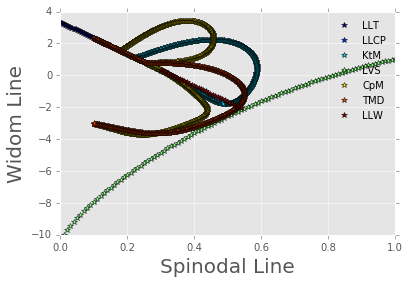

In [38]:
Data = load_data(filename="../Data/a2_03_3.pkl")
ty = gwt.ToyModel(0.3,1./3.)
model4 = gwt.GuggenModel(ty)
minpress = -2.1
offset = 0.6
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if ppty in ["VLS","VLT"] : continue
            model4.addPoint(t,p,ppty,Source="LGRxn1",callback=mycb,offsetCriticalPt=offset)
    except:
        pass
ppty="LLCP"
T,P=Data[ppty]
print((T,P))
model4.addPoint(T,P,ppty,Source="LGRxn1",callback=mycb,offsetCriticalPt=offset)
model4.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='*')
model4.writetoFile('LGRXN-All-2.dat',callback=mycb,add_critical_pt=False)

(0.29999999999999999, 3.3333333333333366)


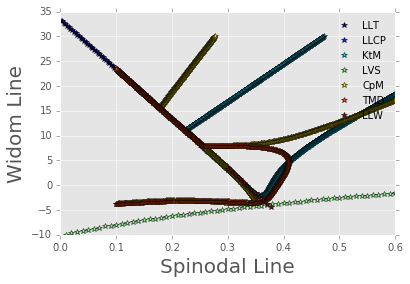

In [39]:
Data = load_data(filename="../Data/a2_003_3.pkl")
ty = gwt.ToyModel(0.3,10./3.,a2=-0.03)
model5 = gwt.GuggenModel(ty)
minpress = -5.1
offset = 1.2
for ppty in Data:
    T,P = Data[ppty]
    try: 
        for t,p in zip(T,P): 
            if ppty == "LLW" and p < minpress: continue
            if t >= 0.6: continue
            if ppty in ["VLS","VLT"] : continue
            model5.addPoint(t,p,ppty,Source="LGRxn3",callback=mycb,offsetCriticalPt=offset)
    except:
        pass
ppty="LLCP"
T,P=Data[ppty]
print((T,P))
model5.addPoint(T,P,ppty,Source="LGRxn3",callback=mycb,offsetCriticalPt=offset)
model5.plot(savefig=False,skip=['Spinodal'],style='ggplot',wait=False,marker='*')
model5.writetoFile('LGRXN-All-3.dat',callback=mycb,add_critical_pt=False)
